In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [11]:
lastdt = session.query(func.max(Measurement.date)).scalar()
firstdt = (dt.datetime.strptime(lastdt, "%Y-%m-%d") - dt.timedelta(365)).strftime("%Y-%m-%d")
print(lastdt)
print(firstdt)

2017-08-23
2016-08-23


In [12]:
record_count = session.query(Measurement).filter(Measurement.date >= firstdt).count()
print(f"{record_count} records exist in the past year")

2230 records exist in the past year


In [13]:
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= firstdt).statement

In [14]:
precip_df = pd.read_sql_query(precip, engine)
precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [15]:
precip_df_dtind = precip_df.set_index('date', drop=True).sort_index().dropna()
precip_df_dtind.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


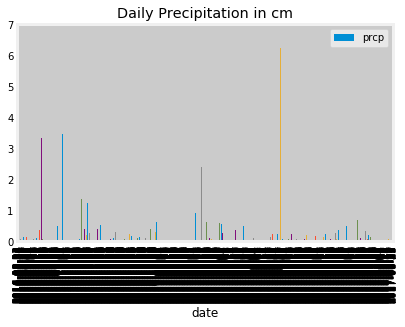

In [16]:
precip_df_dtind.plot(y="prcp",kind="bar", title="Daily Precipitation in cm", grid = 1)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [18]:
precip_desc = pd.DataFrame(precip_df.prcp.describe())
precip_desc

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?

In [20]:
station_count = session.query(Station).count()
print(station_count)

9


In [21]:
#Design a query to calculate the total number of stations.

#Design a query to find the most active stations.

#List the stations and observation counts in descending order.

#Which station has the highest number of observations?

#Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

In [22]:
stations = pd.read_sql_query(session.query(Station).statement, engine)
all_precip = pd.read_sql_query(session.query(Measurement).statement, engine)

In [23]:
merged = pd.merge(all_precip, stations, how='inner', on="station", suffixes=("_precip","_station"))
merged.head()

,id_precip,station,date,prcp,tobs,id_station,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [24]:
merged.station.value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [26]:
mintemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
maxtemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
avetemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
print(f'The lowest temp was {mintemp}, while the highest temp was {maxtemp} and the average was {avetemp}')

The lowest temp was 54.0, while the highest temp was 85.0 and the average was 71.66378066378067


In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [28]:
dtlast = session.query(func.max(Measurement.date)).filter(Measurement.station == 'USC00519281').scalar()
dtfirst = (dt.datetime.strptime(dtlast, "%Y-%m-%d") - dt.timedelta(365)).strftime("%Y-%m-%d")
print(dtlast)
print(dtfirst)

2017-08-18
2016-08-18


In [29]:
temps = session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.date >= dtfirst, Measurement.station == 'USC00519281').statement
temp_df = pd.read_sql_query(temps, engine)
temp_df.describe()

,tobs
count,357.000000
mean,73.196078
std,4.759460
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


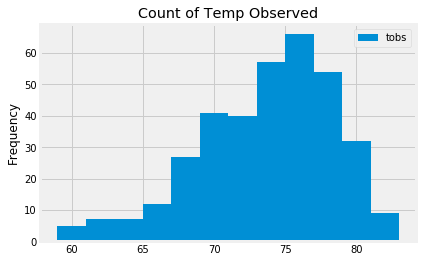

In [30]:
temp_df.plot(y="tobs",kind="hist", title="Count of Temp Observed",
             grid=True, bins=12)